In [1]:
import pylifted
import numpy as np
import matplotlib.pyplot as plt
import pywt
import functools

In [2]:
pylifted.get_vectorization_info()

{'vectorized': True, 'vector length': 32}

In [3]:
pywt.wavelist();

In [40]:
n1, n2 = 1024, 1024
x = np.linspace(-10, 10, n1)
x2 = np.linspace(-10, 10, n2)
y = 1/(x**2 + 4)

y2 = 1/((x - 2)[:, None]**2 + (x2+3)**2 + 4)

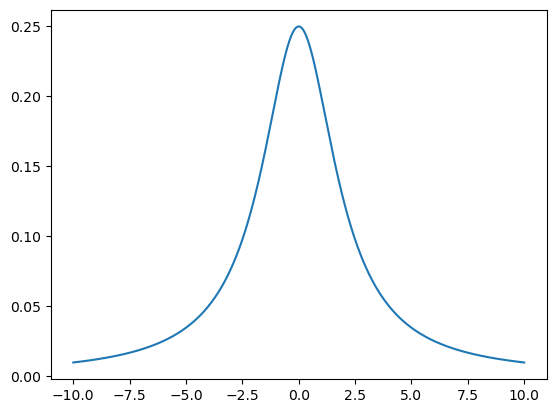

In [41]:
plt.plot(x, y)

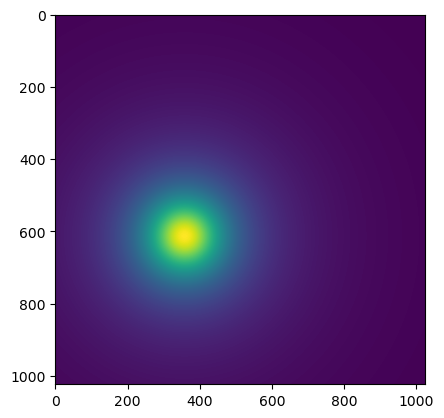

In [42]:
plt.imshow(y2)

In [43]:
yw_bior31 = pylifted.lift_transform(y, wavelet='bior4.2', mode='symmetric', level=0)

yw_bior31IT = pylifted.lift_transform(y, wavelet='bior4.2', mode='symmetric', level=0, forward=False, adjoint=True)

In [44]:
y_r = pylifted.lift_transform(yw_bior31, wavelet='bior4.2', mode='symmetric', level=0, forward=False)

In [45]:
np.allclose(y, y_r)

True

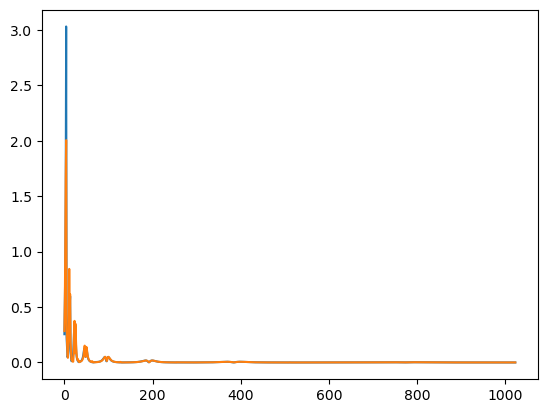

In [46]:
plt.plot(np.abs(yw_bior31))
plt.plot(np.sqrt(np.abs(yw_bior31IT * yw_bior31)))

In [47]:
y_pywt = pywt.dwt2(y2, 'bior3.1', mode='zero')

In [48]:
y_lift = pylifted.lift_transform(y2, 'bior3.1', mode='reflect')

In [49]:
y_pywt[0].shape

(513, 513)

In [50]:
y_lift.shape

(1024, 1024)

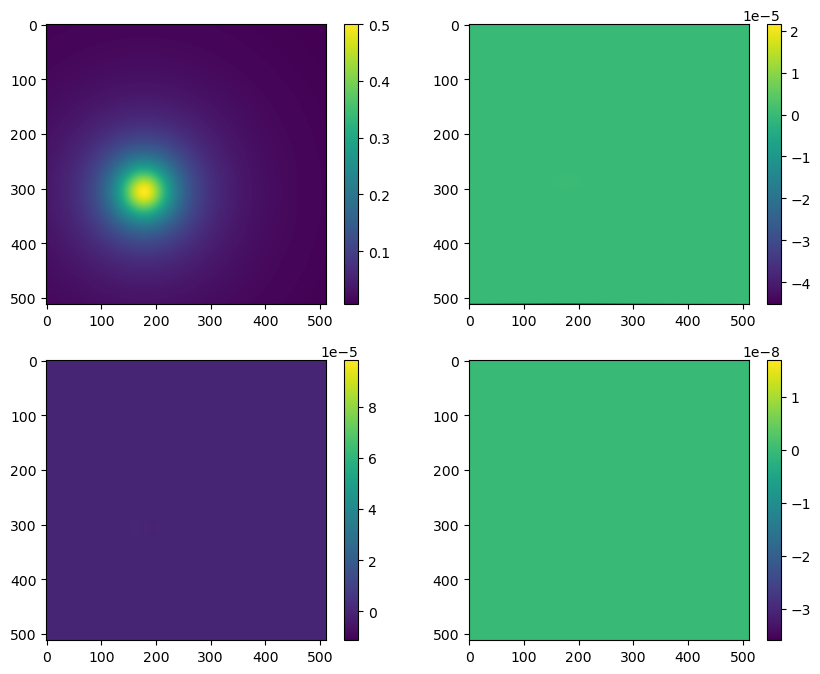

In [51]:
n1s = (n1 + 1) // 2
n2s = (n2 + 1) // 2
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(y_lift[:n1s, : n2s])
plt.colorbar()
plt.subplot(2, 2, 2)
plt.imshow(y_lift[n1s:, : n2s])
plt.colorbar()
plt.subplot(2, 2, 3)
plt.imshow(y_lift[:n1s, n2s:])
plt.colorbar()
plt.subplot(2, 2, 4)
plt.imshow(y_lift[n1s:, n2s:])
plt.colorbar()

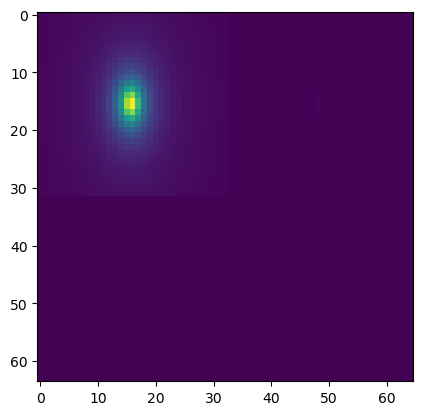

In [17]:
y2_w = pylifted.lift_transform(y2, wavelet='bior3.1', mode='reflect', level=1)
y2_r = pylifted.lift_transform(y2_w, wavelet='bior3.1', mode='reflect', level=1, forward=False)

plt.imshow(y2_w)

In [18]:
n1 = 23

u = np.random.rand(n1)
v = np.random.rand(n1)

wvlt = 'bior3.1'
mode = 'zero'
axes = (0, 1)

func = functools.partial(pylifted.lift_transform, wavelet=wvlt, mode=mode, forward=False)

v_dot_Fu = v.dot(func(u))
FTv_dot_u = func(v, adjoint=True).dot(u)

v_dot_Fu, FTv_dot_u

(np.float64(5.524060573282066), np.float64(5.524060573282066))

In [19]:
n1, n2 = 23, 41

u = np.random.rand(n1, n2)
v = np.random.rand(n1, n2)

v_dot_Fu = v.reshape(-1).dot(func(u, level=(0, 0)).reshape(-1))
FTv_dot_u = func(v, adjoint=True, level=(0, 0)).reshape(-1).dot(u.reshape(-1))

v_dot_Fu, FTv_dot_u

(np.float64(21.633719927589954), np.float64(21.633719927589958))

In [20]:
n1, n2, n3 = 14, 23, 41

u = np.random.rand(n1, n2, n3)
v = np.random.rand(n1, n2, n3)

v_dot_Fu = v.reshape(-1).dot(func(u, axes=(1, 0), level=(0, 1)).reshape(-1))
FTv_dot_u = func(v, adjoint=True, axes=(1, 0), level=(0, 1)).reshape(-1).dot(u.reshape(-1))

v_dot_Fu, FTv_dot_u

(np.float64(703.707668642708), np.float64(703.707668642708))

In [21]:
n1, n2, n3 = 14, 23, 41

u = np.random.rand(n1, n2, n3)
v = np.random.rand(n1, n2, n3)

v_dot_Fu = v.reshape(-1).dot(func(u, axes=(2, 0)).reshape(-1))
FTv_dot_u = func(v, adjoint=True, axes=(2, 0)).reshape(-1).dot(u.reshape(-1))

v_dot_Fu, FTv_dot_u

(np.float64(1639.17050341931), np.float64(1639.1705034193103))

In [22]:
n1 = 23

u = np.random.rand(n1)
v = np.random.rand(n1)

wvlt = 'bior3.1'
mode = 'reflect'
axes = (0, 1)

func = functools.partial(pylifted.lift_transform, wavelet=wvlt, mode=mode)

v_dot_u = v.dot(u)
ITv_dot_Fu = func(v, forward=False, adjoint=True).dot(func(u))

v_dot_u, ITv_dot_Fu

(np.float64(4.960842601795978), np.float64(4.960842601795977))

In [23]:
n1, n2 = 23, 41

u = np.random.rand(n1, n2)
v = np.random.rand(n1, n2)

v_dot_Fu = v.reshape(-1).dot(func(u).reshape(-1))
FTv_dot_u = func(v, adjoint=True).reshape(-1).dot(u.reshape(-1))

v_dot_Fu, FTv_dot_u

(np.float64(124.28035944671208), np.float64(124.28035944671205))

In [39]:
%%timeit
pylifted.lift_transform(y2, wavelet='db5', mode='reflect', level=3, n_threads=16)

5.03 ms ± 45.3 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
%%timeit
pywt.dwt2(y2, 'db5', mode='reflect')

19.4 ms ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
%%timeit
pylifted.lift_transform(y2, wavelet='db5', mode='reflect', level=(3, 3), n_threads=4)

4.61 ms ± 126 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
